<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


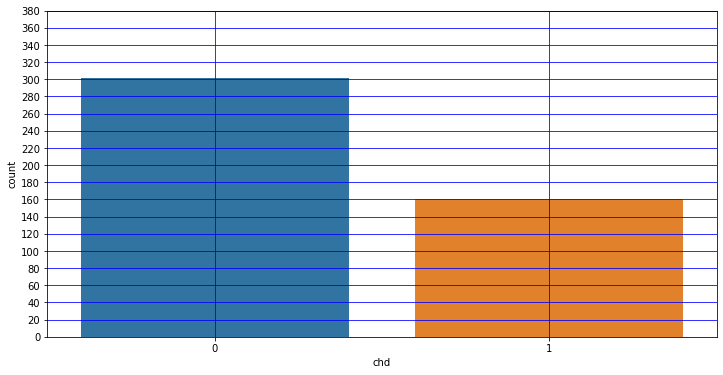

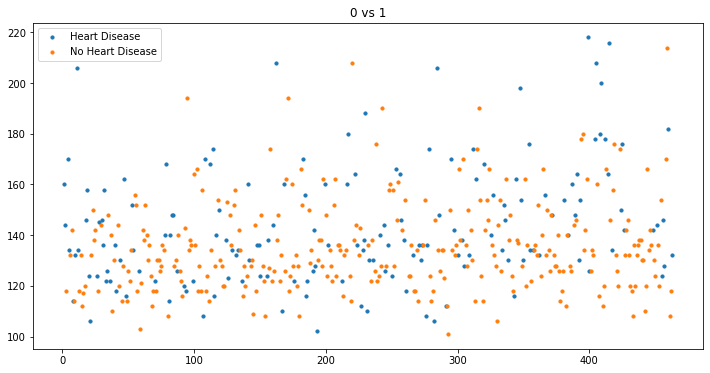

302
160
462
Percent of 0: 65.36796536796537%
Percent of 1: 34.63203463203463%
Standardizes Features: 
     famhist_Present       sbp   tobacco  ...     typea   obesity   alcohol
0           1.184570  1.057417  1.821099  ... -0.418017 -0.176594  3.274189
1          -0.842361  0.276789 -0.789382  ...  0.193134  0.670646 -0.612081
2           1.184570 -0.991731 -0.774141  ... -0.112441  0.734723 -0.540597
3           1.184570  1.545310  0.841352  ... -0.214300  1.411091  0.294742
4           1.184570 -0.211103  2.169453  ...  0.702427 -0.012842  1.645991
..               ...       ...       ...  ...       ...       ...       ...
457        -0.842361  3.692037 -0.704470  ...  1.109862  0.570971 -0.696228
458        -0.842361  2.130781  0.122871  ... -0.112441  0.608942  0.068445
459        -0.842361 -1.479624 -0.138395  ... -1.334744 -1.413043  0.391960
460        -0.842361 -0.991731  0.384137  ...  1.109862  0.309916  0.282897
461         1.184570 -0.308682 -0.791559  ...  0.906144 -2.692

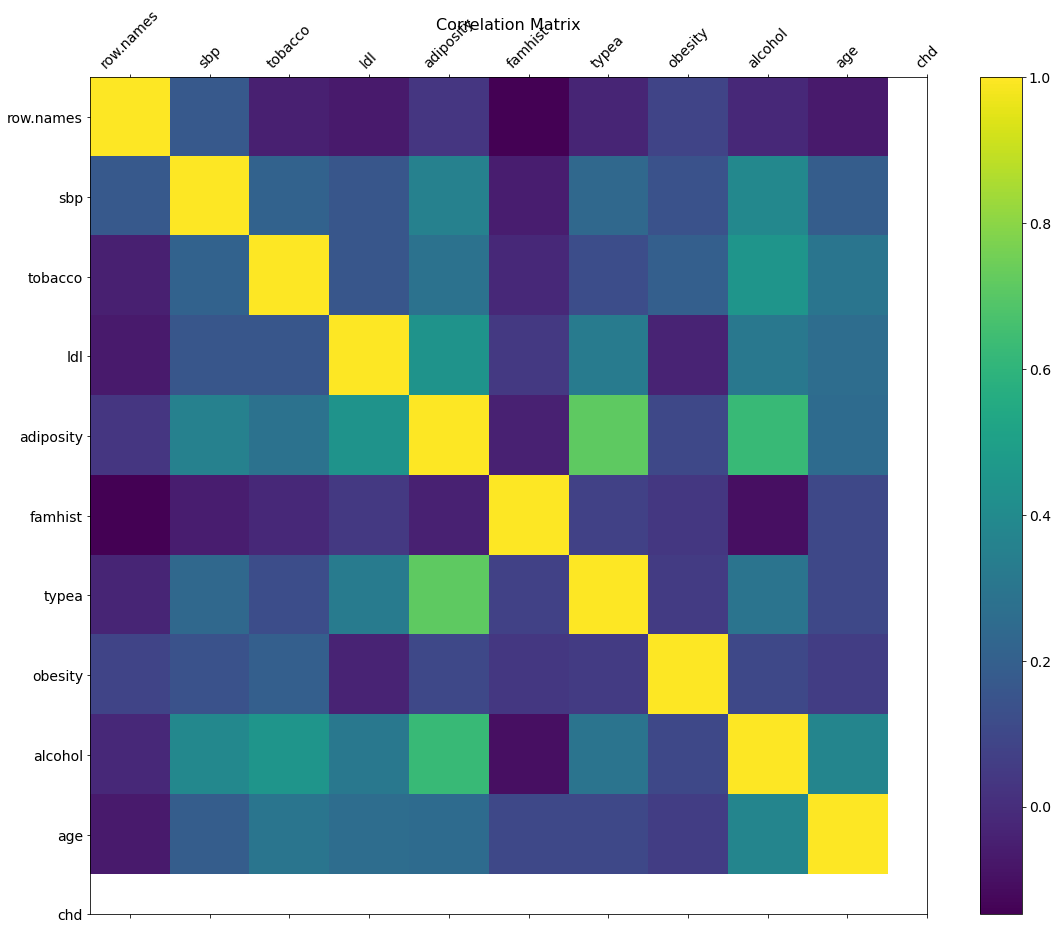

In [50]:
# PART 1: Missing Values, Percentage, Maximum Correlation, One-Hot-Encoding & Standardization
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
 
url = 'https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv'
df1 = pd.read_csv(url) 
 
 
df1._get_numeric_data()
cols = df1.columns
num_cols = df1._get_numeric_data().columns

# Finding Missing Values
df1.info()   # no missing values

from seaborn import axes_style
 
with axes_style({'axes.grid': False}, {'grid.color': "blue"}):
    fig = plt.figure(figsize=(12,6))
 
    a = sns.countplot(x=df1['chd'])
    a.set_yticks([t*20 for t in range(0, 20)])
    a.grid(zorder=0)


chd = df1.iloc[:, 10] # target value
heart = df1.loc[chd == 1]
not_heart = df1.loc[chd == 0]
fig2 = plt.figure(figsize=(12,6))
plt.title("0 vs 1")
plt.scatter(heart.iloc[:, 0], heart.iloc[:, 1], s=10, label='Heart Disease')
plt.scatter(not_heart.iloc[:, 0], not_heart.iloc[:, 1], s=10, label='No Heart Disease')
plt.legend()
plt.show()

# Finding Percentage of Class 0 and Class 1
p = df1["chd"].value_counts()
print(p[0])
print(p[1])
t = (p[0] + p[1])
print(t)
per1 = ((p[1]/t)*100)
per2 = ((p[0]/t)*100)
 
print('Percent of 0: ' + str(per2) + '%')
print('Percent of 1: ' + str(per1) + '%')

# Finding Correlation
f = plt.figure(figsize=(19, 15))
plt.matshow(df1.corr(), fignum=f.number)
plt.xticks(range(df1.shape[1]), df1.columns, fontsize=14, rotation=45)
plt.yticks(range(df1.shape[1]), df1.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

c1 = ['famhist']
cx = df1[c1]
# One-Hot-Encoding
y = pd.get_dummies(cx.famhist, prefix='famhist')

fam_en = pd.get_dummies(cx.famhist, prefix='famhist')
df = df1.assign(famhist=fam_en['famhist_Absent'])
df2 = df.rename(columns={"row.names": "famhist_Present"})
df21 = df2.rename(columns={"famhist": "famhist_Absent"})
df_final = df21.assign(famhist_Present=fam_en['famhist_Present'])


X1 = df_final.iloc[:, 0:9]
y = df1.iloc[:, 10]

# Standardization of Features
X = X1.iloc[:,0:9].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
print("Standardizes Features: \n" +str(X))

In [ ]:
# Part 2: Defining Functions and Batch Gradient Descent for Different Learning Rates
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
 
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
 
url = 'https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv'
df1 = pd.read_csv(url) 
 
 
df1._get_numeric_data()
cols = df1.columns
num_cols = df1._get_numeric_data().columns

c1 = ['famhist']
cx = df1[c1] # Features

 
fam_en = pd.get_dummies(df1.famhist, prefix='famhist')


fam_en = pd.get_dummies(cx.famhist, prefix='famhist')
df = df1.assign(famhist=fam_en['famhist_Absent'])
df2 = df.rename(columns={"row.names": "famhist_Present"})
df21 = df2.rename(columns={"famhist": "famhist_Absent"})
df_final = df21.assign(famhist_Present=fam_en['famhist_Present'])


X1 = df_final.iloc[:, 0:9]
y = df1.iloc[:, 10]

X = X1.iloc[:,0:9].apply(lambda x: (x-x.mean())/ x.std(), axis=0)


X = np.c_[np.ones((X.shape[0], 1)), X]
X[:10]
y = y[:, np.newaxis]
y[:10]


def sigmoid(z):
    return 1/ (1 + np.exp(-z))# testing the sigmoid function

def costFunction(theta, X, y):
    m=len(y)
    
    predictions = sigmoid(np.dot(X,theta))
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost = 1/m * sum(error)
    
    grad = 1/m * np.dot(X.transpose(),(predictions - y))
    
    return cost[0], grad

m, n = X.shape[0], X.shape[1]
X= np.append(np.ones((m,1)),X,axis=1)
y=y.reshape(m,1)
initial_theta = np.zeros((n+1,1))
cost, grad = costFunction(initial_theta,X,y)
print("Cost of initial theta is",cost)
print("Gradient at initial theta (zeros):",grad)

def gradientDescent(X,y,theta,alpha,num_iters):
    
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costFunction(theta,X,y)
        theta = theta - (alpha * grad)
        J_history.append(cost)
   
    return theta , J_history

theta, J_history = gradientDescent(X,y,initial_theta,0.001,500)
theta1, J_history1 = gradientDescent(X,y,initial_theta,0.001,1000)
theta2, J_history2 = gradientDescent(X,y,initial_theta,0.001,10000)

theta3, J_history3 = gradientDescent(X,y,initial_theta,0.0001,500)
theta4, J_history4 = gradientDescent(X,y,initial_theta,0.0001,1000)
theta5, J_history5 = gradientDescent(X,y,initial_theta,0.0001,10000)

print("WHEN LEARNING RATE = 0.001 AND ITERATIONS = 500")
print("Theta optimized by gradient descent:",theta)
print("The cost of the optimized theta:", J_history[-1])

fig = plt.figure(figsize=(8, 8))
plt.plot(J_history)
plt.xlabel("Iteration (500)")
plt.ylabel("Cost")
plt.title("Cost function for l = 0.001 and i = 500")

print("WHEN LEARNING RATE = 0.001 AND ITERATIONS = 1000")
print("Theta optimized by gradient descent:",theta1)
print("The cost of the optimized theta:", J_history1[-1])

fig1 = plt.figure(figsize=(8, 8))
plt.plot(J_history1)
plt.xlabel("Iteration (1000)")
plt.ylabel("Cost")
plt.title("Cost function for l = 0.001 and i = 1000")

print("WHEN LEARNING RATE = 0.001 AND ITERATIONS = 10000")
print("Theta optimized by gradient descent:",theta2)
print("The cost of the optimized theta:", J_history2[-1])

fig2 = plt.figure(figsize=(8, 8))
plt.plot(J_history2)
plt.xlabel("Iteration (10000)")
plt.ylabel("Cost")
plt.title("Cost function for l = 0.001 and i = 10000")

print("WHEN LEARNING RATE = 0.001 AND ITERATIONS = 500")
print("Theta optimized by gradient descent:",theta3)
print("The cost of the optimized theta:", J_history3[-1])

fig = plt.figure(figsize=(8, 8))
plt.plot(J_history3)
plt.xlabel("Iteration (500)")
plt.ylabel("Cost")
plt.title("Cost function for l = 0.0001 and i = 500")

print("WHEN LEARNING RATE = 0.001 AND ITERATIONS = 1000")
print("Theta optimized by gradient descent:",theta4)
print("The cost of the optimized theta:", J_history4[-1])

fig1 = plt.figure(figsize=(8, 8))
plt.plot(J_history4)
plt.xlabel("Iteration (1000)")
plt.ylabel("Cost")
plt.title("Cost function for l = 0.0001 and i = 1000")

print("WHEN LEARNING RATE = 0.001 AND ITERATIONS = 10000")
print("Theta optimized by gradient descent:",theta5)
print("The cost of the optimized theta:", J_history5[-1])

fig2 = plt.figure(figsize=(8, 8))
plt.plot(J_history5)
plt.xlabel("Iteration (10000)")
plt.ylabel("Cost")
plt.title("Cost function for l = 0.0001 and i = 10000")

Index(['row.names', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea',
       'obesity', 'alcohol', 'age', 'chd'],
      dtype='object')
 MINI-BATCH: WHEN LEARNING RATE = 0.001 AND ITERATIONS = 500
Bias =  [0.34786089]
Coefficients =  [[ 0.05387114]
 [ 0.04554373]
 [ 0.10386393]
 [ 0.0729784 ]
 [ 0.08304788]
 [-0.05387114]
 [ 0.0552475 ]
 [-0.07083942]
 [-0.00599861]]
MINI-BATCH: WHEN LEARNING RATE = 0.001 AND ITERATIONS = 1000
Bias =  [0.34707967]
Coefficients =  [[ 0.05300542]
 [ 0.0411754 ]
 [ 0.09984808]
 [ 0.07177201]
 [ 0.08359187]
 [-0.05300542]
 [ 0.05410463]
 [-0.07110694]
 [-0.0122139 ]]
 MINI-BATCH: WHEN LEARNING RATE = 0.001 AND ITERATIONS = 10000
Bias =  [0.34527895]
Coefficients =  [[ 0.0493385 ]
 [ 0.03810258]
 [ 0.09833893]
 [ 0.06841214]
 [ 0.08321941]
 [-0.0493385 ]
 [ 0.05629198]
 [-0.07243055]
 [-0.00776248]]


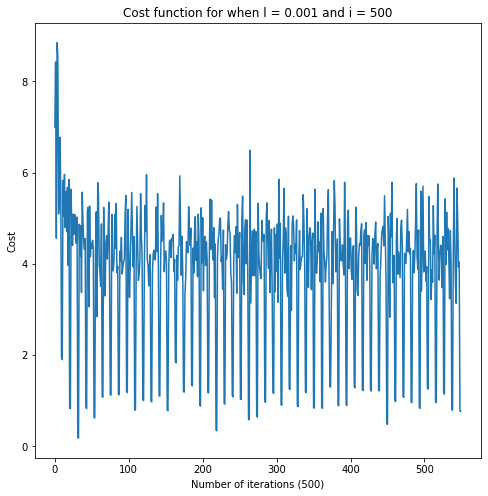

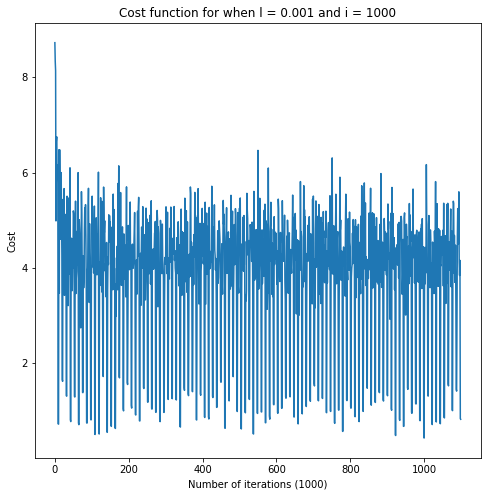

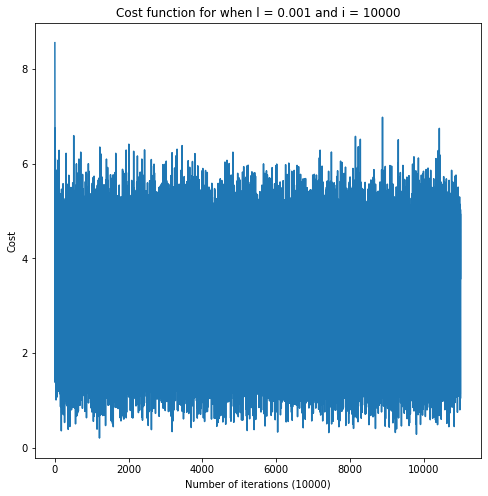

In [47]:
# Part 3: Mini-Batch Gradient Descent for When Learning Rate is 0.001
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

url = 'https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv'
df1 = pd.read_csv(url) 


df1._get_numeric_data()
cols = df1.columns
num_cols = df1._get_numeric_data().columns
print(cols)

#df1.dtypes
#df1.info()   # no missing values


#print(df1)

c1 = ['famhist', 'chd']
#print(c1)
cx = df1[c1] # Features
#print(cx)

fam_en = pd.get_dummies(cx.famhist, prefix='famhist')
df = df1.assign(famhist=fam_en['famhist_Absent'])
df2 = df.rename(columns={"row.names": "famhist_Present"})
df21 = df2.rename(columns={"famhist": "famhist_Absent"})
df_final = df21.assign(famhist_Present=fam_en['famhist_Present'])


X1 = df_final.iloc[:, 0:9]
y = df1.iloc[:, 10]

X = X1.iloc[:,0:9].apply(lambda x: (x-x.mean())/ x.std(), axis=0)


X = np.c_[np.ones((X.shape[0], 1)), X]
X[:10]
y = y[:, np.newaxis]
y[:10]

def hypothesis(X, theta): 
    return np.dot(X, theta) 
  
# function to compute gradient of error function w.r.t. theta 
def gradient(X, y, theta): 
    h = hypothesis(X, theta) 
    grad = np.dot(X.transpose(), (h - y)) 
    return grad 
  
# function to compute the error for current values of theta 
def cost(X, y, theta): 
    h = hypothesis(X, theta) 
    J = np.dot((h - y).transpose(), (h - y)) 
    J /= 2
    return J[0] 

def create_mini_batches(X, y, batch_size): 
    mini_batches = [] 
    data = np.hstack((X, y)) 
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    i = 0
  
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches 

def gradientDescent(X, y, num_iters, learning_rate = 0.001, batch_size = 50): 
    theta = np.zeros((X.shape[1], 1)) 
    error_list = [] 
    max_iters = 1
    for itr in range(num_iters): 
        mini_batches = create_mini_batches(X, y, batch_size) 
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch 
            theta = theta - learning_rate * gradient(X_mini, y_mini, theta) 
            error_list.append(cost(X_mini, y_mini, theta))
    return theta, error_list 

theta, error_list = gradientDescent(X, y, 50)
print(" MINI-BATCH: WHEN LEARNING RATE = 0.001 AND ITERATIONS = 500") 
print("Bias = ", theta[0]) 
print("Coefficients = ", theta[1:]) 


theta1, error_list1 = gradientDescent(X, y, 100) 
print("MINI-BATCH: WHEN LEARNING RATE = 0.001 AND ITERATIONS = 1000")
print("Bias = ", theta1[0]) 
print("Coefficients = ", theta1[1:]) 


theta2, error_list2 = gradientDescent(X, y, 1000) 
print(" MINI-BATCH: WHEN LEARNING RATE = 0.001 AND ITERATIONS = 10000")
print("Bias = ", theta2[0]) 
print("Coefficients = ", theta2[1:]) 


 
# visualising gradient descent 
fig = plt.figure(figsize=(8, 8))
plt.plot(error_list) 
plt.xlabel("Number of iterations (500)") 
plt.ylabel("Cost") 
plt.title("Cost function for when l = 0.001 and i = 500")
plt.show()

# visualising gradient descent 
fig1 = plt.figure(figsize=(8, 8))
plt.plot(error_list1) 
plt.xlabel("Number of iterations (1000)") 
plt.ylabel("Cost") 
plt.title("Cost function for when l = 0.001 and i = 1000")
plt.show()

# visualising gradient descent 
fig2 = plt.figure(figsize=(8, 8))
plt.plot(error_list2) 
plt.xlabel("Number of iterations (10000)") 
plt.ylabel("Cost") 
plt.title("Cost function for when l = 0.001 and i = 10000")
plt.show()

In [ ]:
# Part 4: Mini-Batch Gradient Descent for When Learning Rate is 0.0001
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

url = 'https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv'
df1 = pd.read_csv(url) 


df1._get_numeric_data()
cols = df1.columns
num_cols = df1._get_numeric_data().columns
print(cols)

#df1.dtypes
#df1.info()   # no missing values


#print(df1)

c1 = ['famhist', 'chd']
#print(c1)
cx = df1[c1] # Features
#print(cx)

fam_en = pd.get_dummies(cx.famhist, prefix='famhist')
df = df1.assign(famhist=fam_en['famhist_Absent'])
df2 = df.rename(columns={"row.names": "famhist_Present"})
df21 = df2.rename(columns={"famhist": "famhist_Absent"})
df_final = df21.assign(famhist_Present=fam_en['famhist_Present'])


X1 = df_final.iloc[:, 0:9]
y = df1.iloc[:, 10]

X = X1.iloc[:,0:9].apply(lambda x: (x-x.mean())/ x.std(), axis=0)


X = np.c_[np.ones((X.shape[0], 1)), X]
X[:10]
y = y[:, np.newaxis]
y[:10]

def hypothesis(X, theta): 
    return np.dot(X, theta) 
  
# function to compute gradient of error function w.r.t. theta 
def gradient(X, y, theta): 
    h = hypothesis(X, theta) 
    grad = np.dot(X.transpose(), (h - y)) 
    return grad 
  
# function to compute the error for current values of theta 
def cost(X, y, theta): 
    h = hypothesis(X, theta) 
    J = np.dot((h - y).transpose(), (h - y)) 
    J /= 2
    return J[0] 

def create_mini_batches(X, y, batch_size): 
    mini_batches = [] 
    data = np.hstack((X, y)) 
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    i = 0
  
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches 

def gradientDescent(X, y, num_iters, learning_rate = 0.0001, batch_size = 50): 
    theta = np.zeros((X.shape[1], 1)) 
    error_list = [] 
    max_iters = 1
    for itr in range(num_iters): 
        mini_batches = create_mini_batches(X, y, batch_size) 
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch 
            theta = theta - learning_rate * gradient(X_mini, y_mini, theta) 
            error_list.append(cost(X_mini, y_mini, theta))
    return theta, error_list 

theta, error_list = gradientDescent(X, y, 50)
print(" MINI-BATCH: WHEN LEARNING RATE = 0.0001 AND ITERATIONS = 500") 
print("Bias = ", theta[0]) 
print("Coefficients = ", theta[1:]) 


theta1, error_list1 = gradientDescent(X, y, 100) 
print("MINI-BATCH: WHEN LEARNING RATE = 0.0001 AND ITERATIONS = 1000")
print("Bias = ", theta1[0]) 
print("Coefficients = ", theta1[1:]) 


theta2, error_list2 = gradientDescent(X, y, 1000) 
print(" MINI-BATCH: WHEN LEARNING RATE = 0.0001 AND ITERATIONS = 10000")
print("Bias = ", theta2[0]) 
print("Coefficients = ", theta2[1:]) 


 
# visualising gradient descent 
fig = plt.figure(figsize=(8, 8))
plt.plot(error_list) 
plt.xlabel("Number of iterations (500)") 
plt.ylabel("Cost") 
plt.title("Cost function for when l = 0.0001 and i = 500")
plt.show()

# visualising gradient descent 
fig1 = plt.figure(figsize=(8, 8))
plt.plot(error_list1) 
plt.xlabel("Number of iterations (1000)") 
plt.ylabel("Cost") 
plt.title("Cost function for when l = 0.0001 and i = 1000")
plt.show()

# visualising gradient descent 
fig2 = plt.figure(figsize=(8, 8))
plt.plot(error_list2) 
plt.xlabel("Number of iterations (10000)") 
plt.ylabel("Cost") 
plt.title("Cost function for when l = 0.0001 and i = 10000")
plt.show()

In [ ]:
# Part 5: Implementation of Model using Sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

url = 'https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv'
df1 = pd.read_csv(url) 


df1._get_numeric_data()
cols = df1.columns
num_cols = df1._get_numeric_data().columns
print(cols)

#df1.dtypes
#df1.info()   # no missing values


#print(df1)

c1 = ['famhist', 'chd']
#print(c1)
cx = df1[c1] # Features
#print(cx)

fam_en = pd.get_dummies(cx.famhist, prefix='famhist')
df = df1.assign(famhist=fam_en['famhist_Absent'])
df2 = df.rename(columns={"row.names": "famhist_Present"})
df21 = df2.rename(columns={"famhist": "famhist_Absent"})
df_final = df21.assign(famhist_Present=fam_en['famhist_Present'])


X1 = df_final.iloc[:, 0:9]
y = df1.iloc[:, 10]

X = X1.iloc[:,0:9].apply(lambda x: (x-x.mean())/ x.std(), axis=0)


X = np.c_[np.ones((X.shape[0], 1)), X]
X[:10]
y = y[:, np.newaxis]
y[:10]

model = LogisticRegression()
model.fit(X, y)
predicted_classes = model.predict(X)
accuracy = accuracy_score(y.flatten(),predicted_classes)
parameters = model.coef_

print("Coefficients of model: " + str(parameters))
print("accuracy of model: " + str(accuracy*100))
